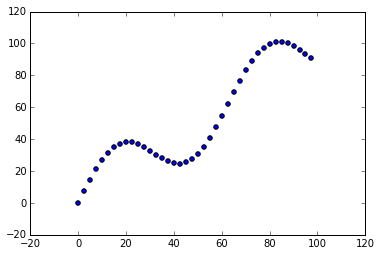

In [5]:
import theano
import theano.tensor as T
import theano.tensor.nnet as NN
#three most useful packages in theano

import numpy as NP
import numpy.random as RNG
%matplotlib inline
import matplotlib.pyplot as plt

# Define input datas
X_data = NP.arange(100, step=2.5)
y_data = X_data + 20 * NP.sin(X_data/10)
# Plot input datas
plt.scatter(X_data, y_data)

X_test = NP.random.rand(200)*120

In [7]:
lr=1e-4 #learning rate

#define inputs
x=T.vector()
y=T.vector()

#define parameters
W=theano.shared(RNG.random())
b=theano.shared(NP.array(0.0))
params = [W,b]

#build the equation 
y_hat = x*W+b

#define the loss
loss = T.mean(0.5*(y_hat-y)**2)

#calculate the gradient 
grads = theano.grad(loss, params)

#gradient descent 
param_update = []
for p,g in zip(params, grads):
    param_update.append((p, p-lr*g))
    
#compile the theano function
train_func = theano.function([x, y], [loss, y_hat], updates=param_update, allow_input_downcast=True)
print 'COMPILE DONE'

COMPILE DONE


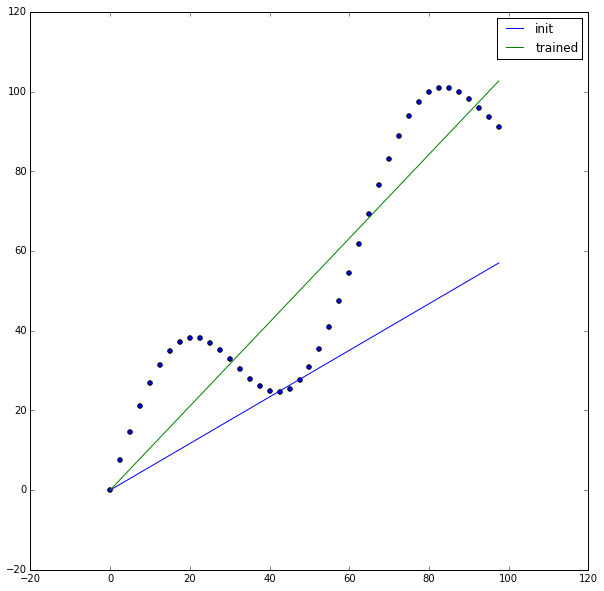

In [8]:
print_flag=False #if you want details of trainning, just enable this flag
fig = plt.figure(figsize=(10,10))
plt.scatter(X_data, y_data)

for i in xrange(50):
    cost, n_out = train_func(X_data, y_data)
    if i==0:
        plt.plot(X_data, n_out)
    if print_flag:
        print 'loss={0:.4f}\tW={1:.4f}\tb={2:.4f}'.format(cost.tolist(), W.get_value().tolist(), b.get_value().tolist())

plt.plot(X_data, n_out)
plt.xlim(-20,120)
plt.ylim(-20,120)
plt.legend(['init', 'trained'])